# 2016-12-02: Dimensionality reduction

## Breast vs ovary cancer data

For this lab, we will work with gene expression data measured on breast and ovary tumors. The data originally comes from http://gemler.fzv.uni-mb.si/index.php but has been downsized so that it is easier to work with in our labs.

The data is similar to the Endometrium vs. Uterus cancer we have been working with for several weeks. 

The data we will work with contains the expression of 3,000 genes, measured for 344 breast tumors and 198 ovary tumors.

### Imports

In [1]:
import numpy as np # numeric python

# scikit-learn (machine learning)q
from sklearn import preprocessing 
from sklearn import decomposition 

In [2]:
# Graphics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Loading the data
It is stored in a CSV file, `small_Breast_Ovary.csv`. It has the same format as the `small_Endometrium_Uterus.csv` file. Load the data, creating a 2-dimensional numpy array X containing the gene expression data, and an 1-dimensional numpy array y containing the labels.

In [3]:
# Load the data
X = np.loadtxt('data/small_Breast_Ovary.csv',  delimiter=',', skiprows=1, usecols=range(1, 3001))

# Python 3
y = np.loadtxt('data/small_Breast_Ovary.csv', delimiter=',', 
               skiprows=1, usecols=[3001], dtype='bytes').astype('str')
#Convert 'Endometrium' to 0 and 'Uterus' to 1
y = np.where(y=='Breast', 0, 1)

**Question** What are the dimensions of X? How many samples come from ovary tumors? How many come from breast tumors?

In [4]:
print("X contains {} samples. Each sample has {} features.".format(np.shape(X)[0], np.shape(X)[1]))
z = np.ones((542,1))
count_ovary = np.dot(y,z)
print("{} samples come from ovary tumors. {} samples come from breast tumors.".format(int(count_ovary[0]), int(542-count_ovary[0])))

X contains 542 samples. Each sample has 3000 features.
198 samples come from ovary tumors. 344 samples come from breast tumors.


## Principal Component Analysis

PCA documentation: http://scikit-learn.org/0.17/modules/decomposition.html#pca and
http://scikit-learn.org/0.17/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

### Data normalization

Remember that PCA works on normalized data (mean 0, standard deviation 1). Normalize the data.

In [5]:
from sklearn import preprocessing
X_norm = np.array(preprocessing.scale(X))
np.shape(X_norm)

(542, 3000)

### 30 first principal components

In [6]:
pca = decomposition.PCA(n_components=30,svd_solver='full')
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

**Question:** Plot the fraction of variance explained by each component. Use `pca.explained_variance_ratio_`

In [7]:
print("The variance explained by each PC are")
print(pca.explained_variance_ratio_)

The variance explained by each PC are
[ 0.13205898  0.03462144  0.02827812  0.023073    0.01954028  0.01758839
  0.01416885  0.01270834  0.01174585  0.01143474  0.01022598  0.009751
  0.00855024  0.00802414  0.00722859  0.00700922  0.00663953  0.0063098
  0.00580649  0.0055306   0.00517346  0.00508748  0.00495225  0.00485792
  0.00477151  0.00452372  0.0044175   0.00430679  0.00415507  0.00412264]


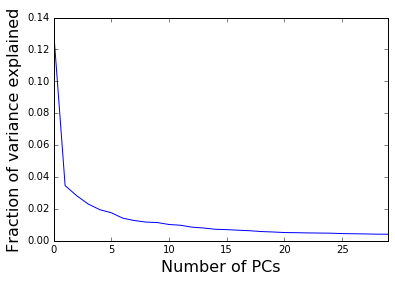

In [8]:
x = list(range(30))

plt.plot(x,pca.explained_variance_ratio_)
plt.xlim([0, 29])
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Fraction of variance explained", fontsize=16)

**Question:** Use `pca.transform` to project the data onto its principal components. How is `pca.explained_variance_ratio_` computed? Check this is the case by computing it yourself.



In [22]:
#Projecting X onto its principal components
X_proj = pca.transform(X_norm)
n,p = np.shape(X_proj)
print("X is now an array with {} samples and {} columns.".format(n,p))

#Computing Sigma
Sigma = corrcoef(X_norm, rowvar=0)

#Computing Singular Value Decomposition of Sigma
u,s,v = np.linalg.svd(Sigma)

#Getting eingenvalues of Sigmea
eigenvalues = list(s)
total_variance = np.array(eigenvalues).sum()

#Keeping only the first 30 largest eigenvalues 
eigenvalues.sort(reverse = True)
eigenvalues = eigenvalues[:30]

#Computing explained variance for each PC
explained_variance = eigenvalues/ total_variance

print("Finaly, the explained variance for each PC is : ")
print(explained_variance)
print("We can check that this array is identical as the one obtained with scikit : ")
print(pca.explained_variance_ratio_)

X is now an array with 542 samples and 25 columns.
Finaly, the explained variance for each PC is : 
[ 0.13205898  0.03462144  0.02827812  0.023073    0.01954028  0.01758839
  0.01416885  0.01270834  0.01174585  0.01143474  0.01022598  0.009751
  0.00855024  0.00802414  0.00722859  0.00700922  0.00663953  0.0063098
  0.00580649  0.0055306   0.00517346  0.00508748  0.00495225  0.00485792
  0.00477151  0.00452372  0.0044175   0.00430679  0.00415507  0.00412264]
We can check that this array is identical as the one obtained with scikit : 
[ 0.13205898  0.03462144  0.02827812  0.023073    0.01954028  0.01758839
  0.01416885  0.01270834  0.01174585  0.01143474  0.01022598  0.009751
  0.00855024  0.00802414  0.00722859  0.00700922  0.00663953  0.0063098
  0.00580649  0.0055306   0.00517346  0.00508748  0.00495225  0.00485792
  0.00477151]


**Question:** Plot the data in the space of the two first components; color breast samples in blue and ovary samples in orange. What do you observe? Can you separate the two classes visually?

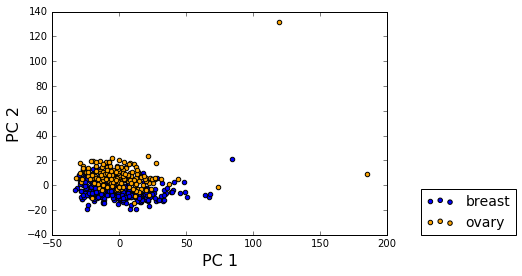

In [24]:
for color_name, tissue, tissue_name in zip(['blue', 'orange'], [0, 1], ['breast', 'ovary']):
    plt.scatter(X_proj[y == tissue,0], X_proj[y == tissue,1],
                c=color_name, label=tissue_name)
plt.legend(loc=(1.1, 0), fontsize=14)
plt.xlabel("PC 1", fontsize=16)
plt.ylabel("PC 2", fontsize=16)

**Answer** As there's a few outliers, it's difficult to separate points visually. We should rescale the plot by ignoring the outliers in order to have a more appropriate scale to draw a decision boundary visually.

**Bonus question:** Rather than visually, actually try to separate the two classes by a logistic regression line (using only the two first PCs). Plot the decision boundary. You can draw inspiration from http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py for the plot.

In [25]:
X_proj_2 = X_proj[:,0:2]
np.shape(X_proj_2)

(542, 2)

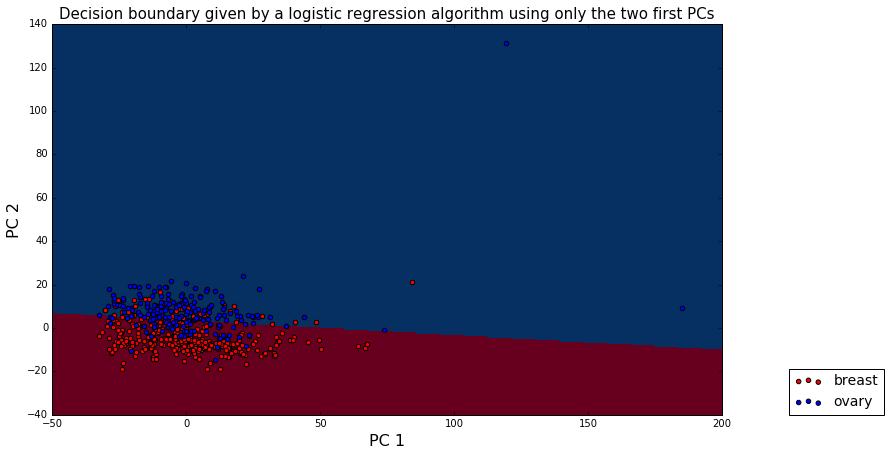

In [26]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

#Keeping only the first two PC
X_proj_2 = X_proj[:,0:2]

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_proj_2, y)

h = 0.6  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -55,205
y_min, y_max = -45,145
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)

# Plot also the training points
for color_name, tissue, tissue_name in zip(['red', 'blue'], [0, 1], ['breast', 'ovary']):
    plt.scatter(X_proj_2[y == tissue, 0], X_proj_2[y == tissue, 1], 
                c=color_name, label=tissue_name, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
plt.legend(loc=(1.1, 0), fontsize=14)
plt.title('Decision boundary given by a logistic regression algorithm using only the two first PCs',fontsize=15)

plt.xlim(-50,200)
plt.ylim(-40,140)

plt.show()

### Outliers
**Question:** How many outliers do you observe in your data? Identify which entries of the X matrix they correspond to, and remove them from your data.

**Answer** We can observe 7 outliers on the previous plot : samples in which PC 1 is greater than 52.

In [13]:
outliers = []
for i in range(len(X_proj)):
    if X_proj[i,0] > 52:
        outliers.append(i)

#Delete outliers from X
X_without_outliers = np.delete(X, outliers, axis = 0)
y_without_outliers = np.delete(y, outliers)
print("Thus, we have now {} samples".format(len(X_without_outliers)))

Thus, we have now 535 samples


**Question:** Repeat the PCA procedure on the data without outliers. Can you now visually separate the two tissues?

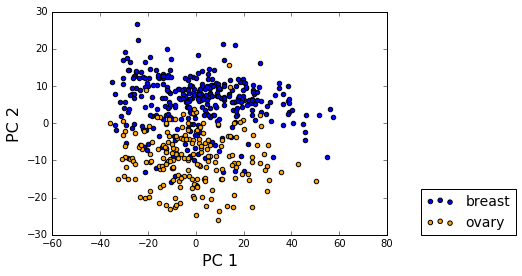

In [27]:
X_norm_without_outliers = np.array(preprocessing.scale(X_without_outliers))

pca = decomposition.PCA(n_components=30,svd_solver='full')
pca.fit(X_norm_without_outliers)
X_proj_without_outliers = pca.transform(X_norm_without_outliers)

for color_name, tissue, tissue_name in zip(['blue', 'orange'], [0, 1], ['breast', 'ovary']):
    plt.scatter(X_proj_without_outliers[y_without_outliers == tissue,0], X_proj_without_outliers[y_without_outliers == tissue,1],
                c=color_name, label=tissue_name)
plt.legend(loc=(1.1, 0), fontsize=14)
plt.xlabel("PC 1", fontsize=16)
plt.ylabel("PC 2", fontsize=16)

**Answer** Indeed, we can now separate the two tissue visually. And, by applying the same logistic regression algorithm, we know have the following plot

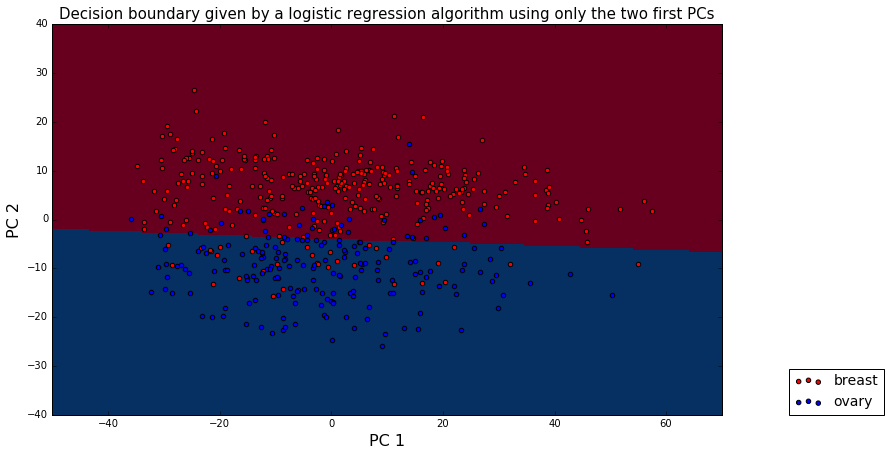

In [15]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

#Keeping only the first two PC
X_proj_3 = X_proj_without_outliers[:,0:2]

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_proj_3, y_without_outliers)

h = 0.4  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -55,75
y_min, y_max = -45,45
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)

# Plot also the training points
for color_name, tissue, tissue_name in zip(['red', 'blue'], [0, 1], ['breast', 'ovary']):
    plt.scatter(X_proj_3[y_without_outliers == tissue, 0], X_proj_3[y_without_outliers == tissue, 1], 
                c=color_name, label=tissue_name, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
plt.legend(loc=(1.1, 0), fontsize=14)
plt.title('Decision boundary given by a logistic regression algorithm using only the two first PCs',fontsize=15)

plt.xlim(-50,70)
plt.ylim(-40,40)

plt.show()

### Classifying dimensionality-reduced data

**Question:** How many PCs do you think are sufficient to represent your data? What do you expect will happen if you use the projection of the gene expressions on these PCs and run a cross-validation of a classification algorithm? Try it out. Is there a risk of overfitting when you do this? 

**Answer** The number of PCs we should keep depend on what we want to do next. If we only want to plot data, 2 PCs are enough. If we want to reduce storage requirements, only a few PCs should be sufficient. Yet, if we want to reduce dimensionality for a classification algorithm, we should keep more PCs than that. We will plot below the scree graph : this will then provide a good indication of when we hit the point of diminishing returns (little variance is gained by retaining additional eigenvalues).

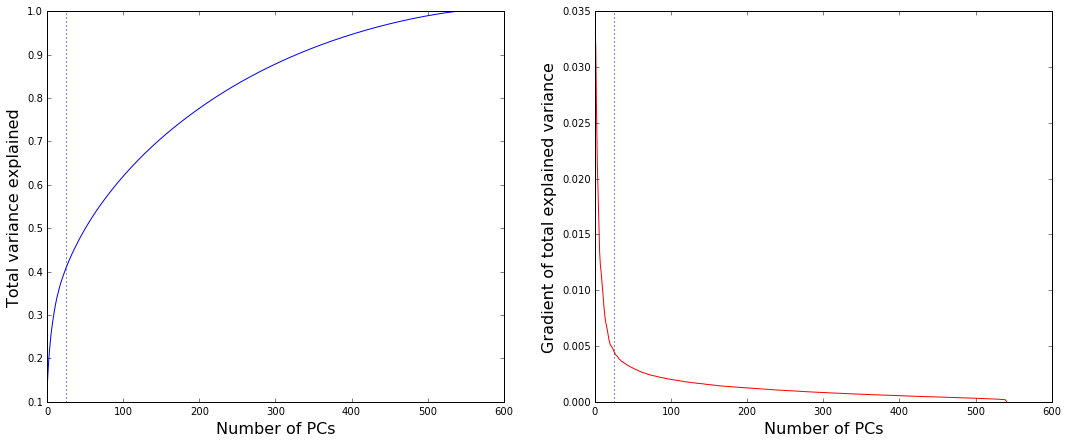

In [28]:
#Doing a PCA on of the maximum number of component (here = n_features)
pca = decomposition.PCA(n_components=542,svd_solver='full')
pca.fit(X_norm)

#Computing the cumulative sum of explained variance ration to show the scree graph
variance_explained = np.cumsum(pca.explained_variance_ratio_)
gradient = numpy.gradient(variance_explained)
x = list(range(542))

#Plot 1 : scree graph
fig = plt.figure(figsize=(18, 7))
fig.add_subplot(121)
plt.plot(x,variance_explained)
plt.axvline(25, linestyle =":")
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Total variance explained", fontsize=16)

#Plot 2 : Gradient of total explained variance
fig.add_subplot(122)
plt.plot(x,gradient,color = 'red')
plt.axvline(25, linestyle =":")
plt.xlabel("Number of PCs", fontsize=16)
plt.ylabel("Gradient of total explained variance", fontsize=16)

Thus, we see that after 25 PCs the increment of variance explained by adding a PC is negligible. We will apply a logistic regression algorithm to see the effect of PCA on the AUC score.

In [29]:
#Compute a PCA with 75 components
pca = decomposition.PCA(n_components=25,svd_solver='full')
pca.fit(X_norm)
X_proj_final = pca.transform(X_norm)

# Set up a stratified 10-fold cross-validation
from sklearn import cross_validation
folds = cross_validation.StratifiedKFold(y, 15, shuffle=True)

In [30]:
def cross_validate(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions. 
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape) # vector of 0 in which to store the predictions
    for tr, te in cv_folds:
        # Restrict data to train/test folds
        Xtr = design_matrix[tr, :]
        ytr = labels[tr]
        Xte = design_matrix[te, :]
        #print Xtr.shape, ytr.shape, Xte.shape

        # Fit classifier
        classifier.fit(Xtr, ytr)
        
        # Scale data
        scaler = preprocessing.StandardScaler() # create scaler
        Xtr = scaler.fit_transform(Xtr) # fit the scaler to the training data and transform training data
        Xte = scaler.transform(Xte) # transform test data

        # Predict probabilities (of belonging to +1 class) on test data
        yte_pred = classifier.predict_proba(Xte) # two-dimensional array
        # Identify the index, in yte_pred, of the positive class (y=1)
        # index_of_class_1 = np.nonzero(classifier.classes_ == 1)[0][0] 
        index_of_class_1 = 1 - ytr[0] # 0 if the first sample is positive, 1 otherwise
        pred[te] = yte_pred[:, index_of_class_1]                
    return pred

In [31]:
#Predicting values using a logistic regression model and the first 25 PCs only
clf = linear_model.LogisticRegression(C=1e6)
ypred_logreg_proj = cross_validate(X_proj_final,y,clf,folds)

In [32]:
#Predicting values using a logistic regression model and the whole dataset
clf = linear_model.LogisticRegression(C=1e6)
ypred_logreg = cross_validate(X,y,clf,folds)

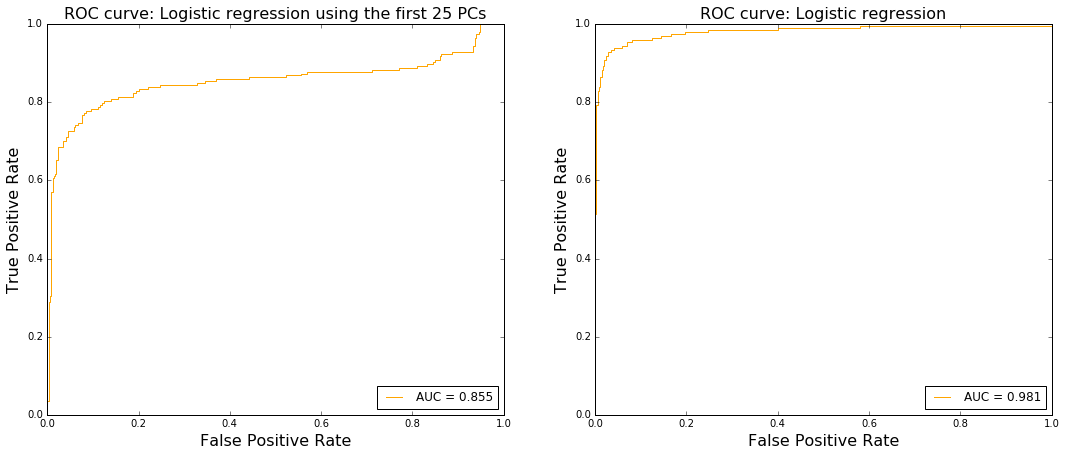

In [33]:
from sklearn import metrics

#Compute fpr, tpr
fpr_logreg_proj, tpr_logreg_proj, thresholds = metrics.roc_curve(y, ypred_logreg_proj, pos_label=1)
fpr_logreg, tpr_logreg, thresholds = metrics.roc_curve(y, ypred_logreg, pos_label=1)

#Transform ypred_logreg into a binary list
ypred_logreg_proj = np.array(ypred_logreg_proj)
pred_proj = [(x >= 0.5).astype(int) for x in ypred_logreg_proj]

#Transform ypred_logreg into a binary list
ypred_logreg = np.array(ypred_logreg)
pred = [(x >= 0.5).astype(int) for x in ypred_logreg]

#Compute AUC
auc_logreg_proj = metrics.auc(fpr_logreg_proj, tpr_logreg_proj)
auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)

#Plot
fig = plt.figure(figsize=(18, 7))

#Plot with the first 25 PCs only
fig.add_subplot(121)
plt.plot(fpr_logreg_proj, tpr_logreg_proj, '-', color='orange', label='AUC = %0.3f' % auc_logreg_proj)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression using the first 25 PCs', fontsize=16)
plt.legend(loc="lower right")

#Plot on the whole dataset
fig.add_subplot(122)
plt.plot(fpr_logreg, tpr_logreg, '-', color='orange', label='AUC = %0.3f' % auc_logreg)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve: Logistic regression', fontsize=16)
plt.legend(loc="lower right")

The AUC score are extremely high here (98 %!), there are very great chances of overfitting here. Yet, we can see that the AUC score on data using 25 PCs is lower. Finaly, as PCA is an unsupervised algorithm, we should not use this method to regularize a model. PCA is not aware of the labels in the training set and so just throws away some information whether there are useful for the purpose of classification or not.

**Question:** Working on the original features, how do you expect your decision boundary (and AUC) to change, for different algorithms, depending on whether or not the outliers are included in the data? Try it out. 

**Answer** Indeed, eliminating non-relevant attributes by doing a PCA can help an algorithm and prevent it from having difficulties to learn a decision boundary. For instance, this should increases the performance of k-nearest neighbors or any distance-based algorithm.